## Keras Callbacks

In [1]:
import sys
if '../modules' not in sys.path: sys.path.append('../modules')

In [2]:
from keras import models, layers, callbacks
from keras import optimizers, losses, preprocessing
from keras.models import Sequential
from keras.datasets import imdb 

import numpy as np
from myutils import *
import keras

Using TensorFlow backend.


### Developing a model from Keras IMDB data

In [3]:
num_features = 50000
max_len = 100

In [4]:
(train_x, train_y),(test_x, test_y) = imdb.load_data(num_words=num_features)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(25000,) (25000,)
(25000,) (25000,)


In [5]:
word_index = imdb.get_word_index()

In [6]:
len(word_index)

88584

In [7]:
print(max([len(x) for x in train_x]))
print(max([len(x) for x in test_x]))

2494
2315


In [8]:
# padding the data
train_x = preprocessing.sequence.pad_sequences(train_x, maxlen=max_len)
test_x = preprocessing.sequence.pad_sequences(test_x, maxlen=max_len)

In [9]:
train_y = np.asarray(train_y, dtype='float32')
test_y = np.asarray(test_y, dtype='float32')

In [10]:
print(max([len(x) for x in train_x]))
print(max([len(x) for x in test_x]))

100
100


### Fitting the model

In [11]:
model = models.Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,608,353
Trainable params: 1,608,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [13]:
hist = model.fit(train_x, train_y, batch_size = 512, epochs=20, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 252us/step - loss: 0.6135 - acc: 0.6852 - val_loss: 0.4965 - val_acc: 0.7658
Epoch 2/20
20000/20000 [==============================] - 4s 208us/step - loss: 0.4064 - acc: 0.8330 - val_loss: 0.4145 - val_acc: 0.8118
Epoch 3/20
20000/20000 [==============================] - 4s 209us/step - loss: 0.2888 - acc: 0.8926 - val_loss: 0.3476 - val_acc: 0.8498
Epoch 4/20
20000/20000 [==============================] - 4s 207us/step - loss: 0.2220 - acc: 0.9212 - val_loss: 0.4118 - val_acc: 0.8152
Epoch 5/20
20000/20000 [==============================] - 4s 210us/step - loss: 0.1735 - acc: 0.9398 - val_loss: 0.4844 - val_acc: 0.8312
Epoch 6/20
20000/20000 [==============================] - 4s 212us/step - loss: 0.1384 - acc: 0.9543 - val_loss: 0.4209 - val_acc: 0.8374
Epoch 7/20
20000/20000 [==============================] - 4s 205us/step - loss: 0.1174 - acc: 0.9606 - val_loss: 0.3937 - v

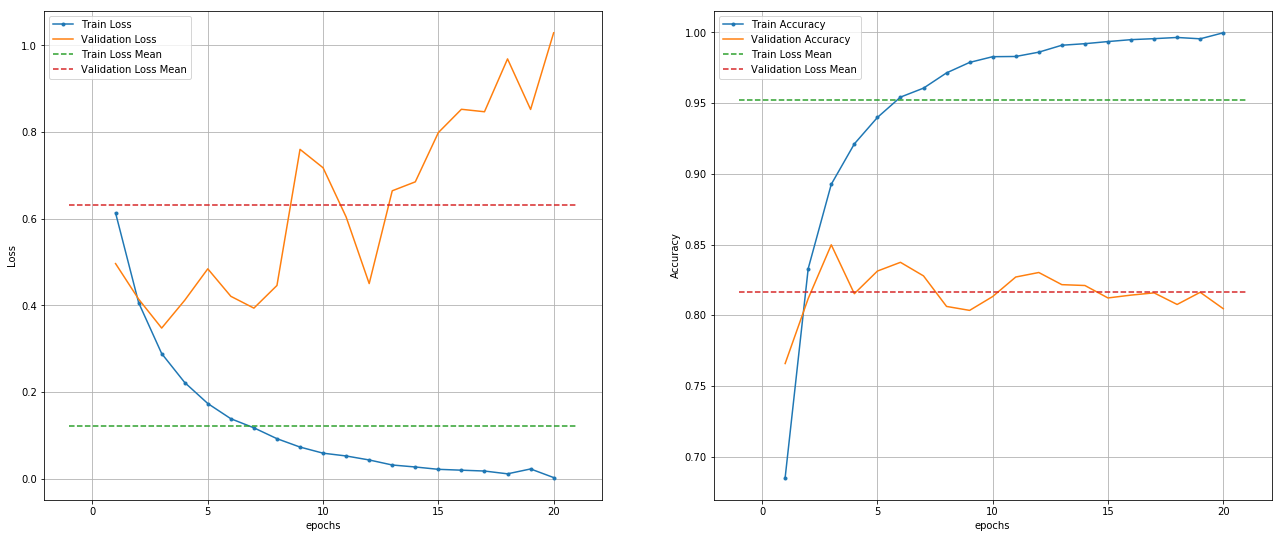

In [14]:
plot_keras_acc_ax(hist)

### Setting up callbacks

In [15]:
model2 = models.Sequential()
model2.add(layers.Embedding(num_features, 32))
model2.add(layers.LSTM(32))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,608,353
Trainable params: 1,608,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
callbacks_settings = [callbacks.EarlyStopping(monitor='acc', patience=2), 
                      callbacks.ModelCheckpoint(monitor='val_loss', filepath='l7b_imdb.h5', save_best_only=True)]

In [17]:
# fitting with call back
hist2 = model2.fit(train_x, train_y, callbacks=callbacks_settings, batch_size = 512, epochs=20, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 224us/step - loss: 0.6029 - acc: 0.6847 - val_loss: 0.4654 - val_acc: 0.7994
Epoch 2/20
20000/20000 [==============================] - 4s 205us/step - loss: 0.3930 - acc: 0.8370 - val_loss: 0.3875 - val_acc: 0.8246
Epoch 3/20
20000/20000 [==============================] - 4s 206us/step - loss: 0.2847 - acc: 0.8927 - val_loss: 0.3586 - val_acc: 0.8400
Epoch 4/20
20000/20000 [==============================] - 4s 207us/step - loss: 0.2170 - acc: 0.9222 - val_loss: 0.3492 - val_acc: 0.8484
Epoch 5/20
20000/20000 [==============================] - 4s 205us/step - loss: 0.1719 - acc: 0.9392 - val_loss: 0.3321 - val_acc: 0.8560
Epoch 6/20
20000/20000 [==============================] - 4s 204us/step - loss: 0.1371 - acc: 0.9552 - val_loss: 0.7165 - val_acc: 0.8094
Epoch 7/20
20000/20000 [==============================] - 4s 205us/step - loss: 0.1096 - acc: 0.9658 - val_loss: 0.3623 - v

In [18]:
model3 = models.Sequential()
model3.add(layers.Embedding(num_features, 32))
model3.add(layers.LSTM(32))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.summary()

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,608,353
Trainable params: 1,608,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
callbacks_settings = [callbacks.EarlyStopping(monitor='acc', patience=2), 
                      callbacks.ModelCheckpoint(monitor='val_loss', filepath='l7b_imdb.h5', save_best_only=True),
                      callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2, min_lr=0.001)]

In [20]:
hist3 = model3.fit(train_x, train_y, callbacks=callbacks_settings, batch_size = 512, epochs=20, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 224us/step - loss: 0.6213 - acc: 0.6768 - val_loss: 0.5112 - val_acc: 0.7896
Epoch 2/20
20000/20000 [==============================] - 4s 207us/step - loss: 0.4166 - acc: 0.8334 - val_loss: 0.4071 - val_acc: 0.8204
Epoch 3/20
20000/20000 [==============================] - 4s 207us/step - loss: 0.2996 - acc: 0.8845 - val_loss: 0.3743 - val_acc: 0.8454
Epoch 4/20
20000/20000 [==============================] - 4s 208us/step - loss: 0.2322 - acc: 0.9158 - val_loss: 0.3706 - val_acc: 0.8432
Epoch 5/20
20000/20000 [==============================] - 4s 208us/step - loss: 0.1879 - acc: 0.9356 - val_loss: 0.3858 - val_acc: 0.8430
Epoch 6/20
20000/20000 [==============================] - 4s 207us/step - loss: 0.1462 - acc: 0.9511 - val_loss: 0.5857 - val_acc: 0.8096
Epoch 7/20
20000/20000 [==============================] - 4s 206us/step - loss: 0.1175 - acc: 0.9623 - val_loss: 0.4653 - v

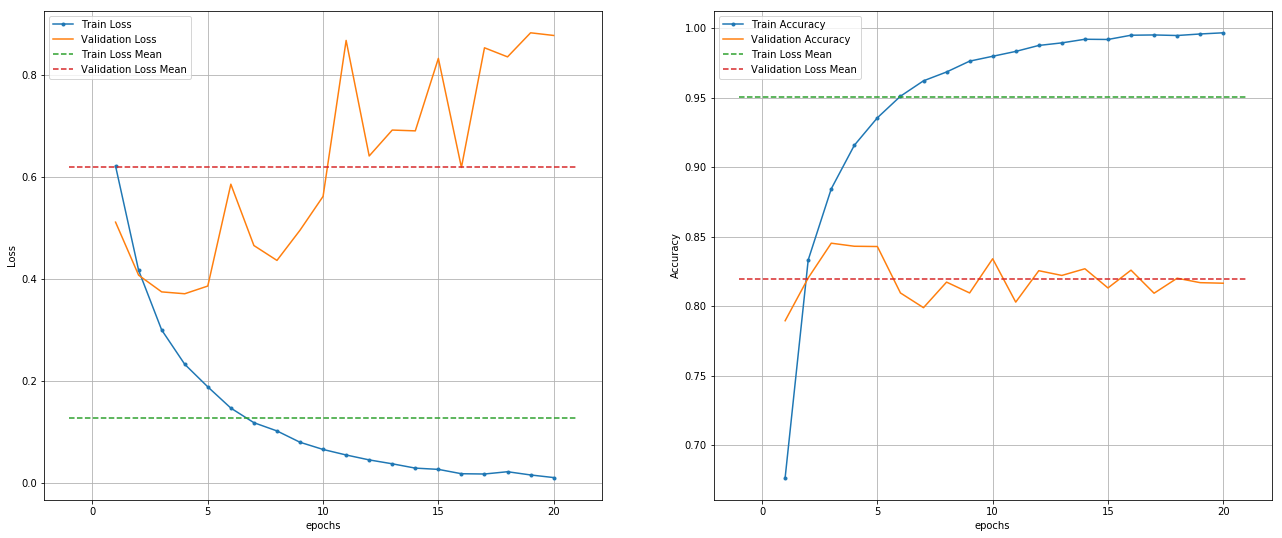

In [21]:
plot_keras_acc_ax(hist3)

## Using TensorBoard

In [22]:
# creating directory for tensor logs
# !mkdir tensor_logs

In [23]:
model4 = models.Sequential()
model4.add(layers.Embedding(num_features, 32))
model4.add(layers.LSTM(32))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.summary()

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          1600000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,608,353
Trainable params: 1,608,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
callbacks_settings = [callbacks.EarlyStopping(monitor='acc', patience=2), 
                      callbacks.ModelCheckpoint(monitor='val_loss', filepath='l7b_imdb_tensor.h5', save_best_only=True),
                      callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2, min_lr=0.001),
                      callbacks.TensorBoard(log_dir='./tensor_logs', histogram_freq=1, embeddings_freq=1)]

In [25]:
hist4 = model4.fit(train_x, train_y, callbacks=callbacks_settings, batch_size = 512, epochs=20, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 4s 222us/step - loss: 0.5946 - acc: 0.6908 - val_loss: 0.4854 - val_acc: 0.7656
Epoch 2/20
20000/20000 [==============================] - 4s 210us/step - loss: 0.3773 - acc: 0.8463 - val_loss: 0.3984 - val_acc: 0.8206
Epoch 3/20
20000/20000 [==============================] - 4s 211us/step - loss: 0.2757 - acc: 0.8953 - val_loss: 0.4369 - val_acc: 0.8252
Epoch 4/20
20000/20000 [==============================] - 4s 211us/step - loss: 0.2160 - acc: 0.9236 - val_loss: 0.6119 - val_acc: 0.7852
Epoch 5/20
20000/20000 [==============================] - 4s 213us/step - loss: 0.1665 - acc: 0.9452 - val_loss: 0.5623 - val_acc: 0.8076
Epoch 6/20
20000/20000 [==============================] - 4s 211us/step - loss: 0.1426 - acc: 0.9528 - val_loss: 0.4363 - val_acc: 0.8356
Epoch 7/20
20000/20000 [==============================] - 4s 213us/step - loss: 0.1101 - acc: 0.9668 - val_loss: 0.3919 - v

In [26]:
#!tensorboard --logdir=./tensor_logs

### Checking the graph

In [27]:
from keras.utils import plot_model

In [28]:
plot_model(model4, to_file='l7b_imdb.png',show_shapes=True)